In [10]:
from extract import *
from train import *
import cv2
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [3]:
root = "./"
extractor = FeatureExtractor(train_parameters, model)
vehicles_files = glob.glob(root + 'vehicles/**/*.png', recursive=True)
non_vehicles_files = glob.glob(root + 'non-vehicles/non-vehicles/Extras/*.png', recursive=True)

In [11]:
from sklearn.utils import shuffle
cars = shuffle(vehicles_files)
notcars = shuffle(non_vehicles_files)

In [57]:
def show_ax_image(ax, img):
    if img.ndim == 3 and img.shape[2] == 3:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        ax.imshow(img, cmap='gray')
#     ax.set_title(title, fontsize=40)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])

def show_processed_images(images):
    n_img = len(images)
    cols = 8
    rows = ceil(n_img / cols)
    f, axs = plt.subplots(rows, cols, figsize=(12, 9))
    for i, img in enumerate(images):
        col = i % cols
        row = int(i / cols)
        if row < 1:
            ax = axs[col]
        else:
            ax = axs[row, col]
        show_ax_image(ax, img)

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

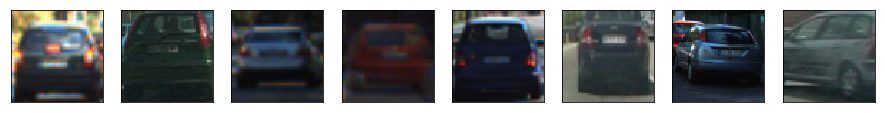

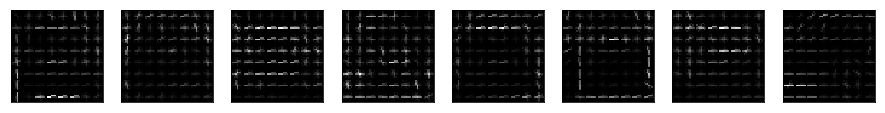

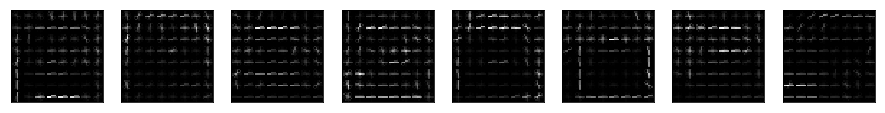

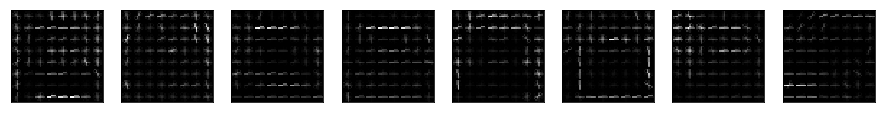

In [58]:
images = []
hog_ch0 = []
hog_ch1 = []
hog_ch2 = []
for filename in cars[:8]:
    img = cv2.imread(filename)
    _, hog = extractor.get_hog_features(img[:,:,0], True)
    hog_ch0.append(hog)
    _, hog = extractor.get_hog_features(img[:,:,1], True)
    hog_ch1.append(hog)
    _, hog = extractor.get_hog_features(img[:,:,2], True)
    hog_ch2.append(hog)
    
    images.append(img)
show_processed_images(images)
show_processed_images(hog_ch0)
show_processed_images(hog_ch1)
show_processed_images(hog_ch2)

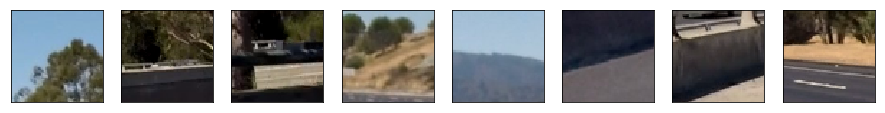

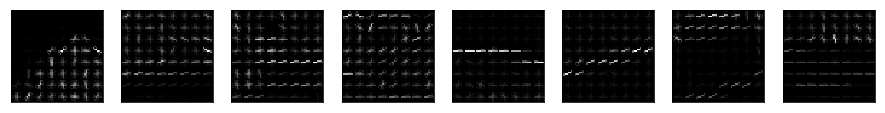

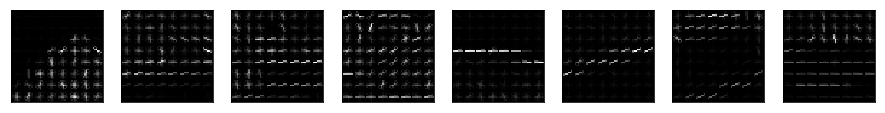

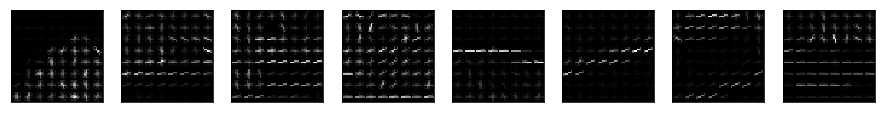

In [59]:
images = []
hog_ch0 = []
hog_ch1 = []
hog_ch2 = []
for filename in notcars[:8]:
    img = cv2.imread(filename)
    _, hog = extractor.get_hog_features(img[:,:,0], True)
    hog_ch0.append(hog)
    _, hog = extractor.get_hog_features(img[:,:,1], True)
    hog_ch1.append(hog)
    _, hog = extractor.get_hog_features(img[:,:,2], True)
    hog_ch2.append(hog)
    
    images.append(img)
show_processed_images(images)
show_processed_images(hog_ch0)
show_processed_images(hog_ch1)
show_processed_images(hog_ch2)

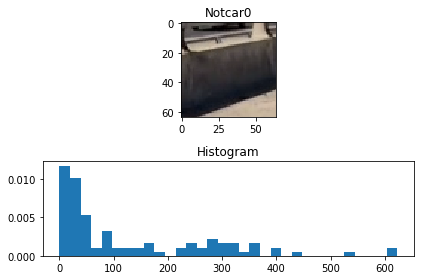

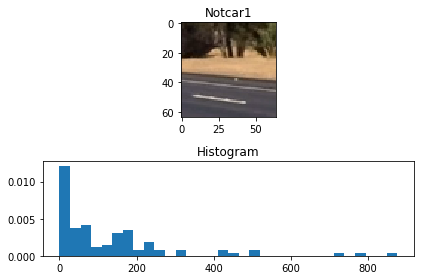

In [80]:
images = []
hists = []
for filename in notcars[6:8]:
    img = cv2.imread(filename)
    hist = extractor.color_hist(img)
    hists.append(hist)
    images.append(img)
    
# plt.imshow(images[0])
# plt.show()
# plt.hist(hists[0], normed=True, bins=32)
# plt.show()
for i in range(len(images)):
    fig = plt.figure()
    plt.subplot(211)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title('Notcar'+str(i))
    plt.subplot(212)
    plt.hist(hists[i], normed=True, bins=32)
    plt.title('Histogram')
    fig.tight_layout()
    plt.show()